In [12]:
import cognitive_face as CF

KEY = '4a4da3a3c1ed4365abd0c7faa4d4eae5'  # Replace with a valid subscription key (keeping the quotes in place).
CF.Key.set(KEY)

BASE_URL = 'https://koreacentral.api.cognitive.microsoft.com/face/v1.0'  # Replace with your regional Base URL
CF.BaseUrl.set(BASE_URL)

# You can use this example JPG or replace the URL below with your own URL to a JPEG image.
img_url = 'http://www.newsinside.kr/news/photo/201612/436875_259591_74.jpg'
faces = CF.face.detect(img_url)
print(faces)

[{'faceId': '80ea8359-446c-41a6-8186-c04ce480c825', 'faceRectangle': {'top': 115, 'left': 197, 'width': 156, 'height': 156}}]


**Properties(faceRectangle)**

**height**
The height of the rectangle, in pixels.

**left**
The distance from the left edge if the image to the left edge of the rectangle, in pixels.

**top**
The distance from the top edge if the image to the top edge of the rectangle, in pixels.

**width**
The width of the rectangle, in pixels.

https://www.journaldev.com/19178/python-io-bytesio-stringio

파이썬 requests 모듈은 간편한 HTTP 요청처리를 위해 사용하는 모듈

**data can be kept as bytes** in an in-memory buffer when we use io module’s Byte IO operations.(사진)




In [0]:
import requests
from io import BytesIO
from PIL import Image, ImageDraw

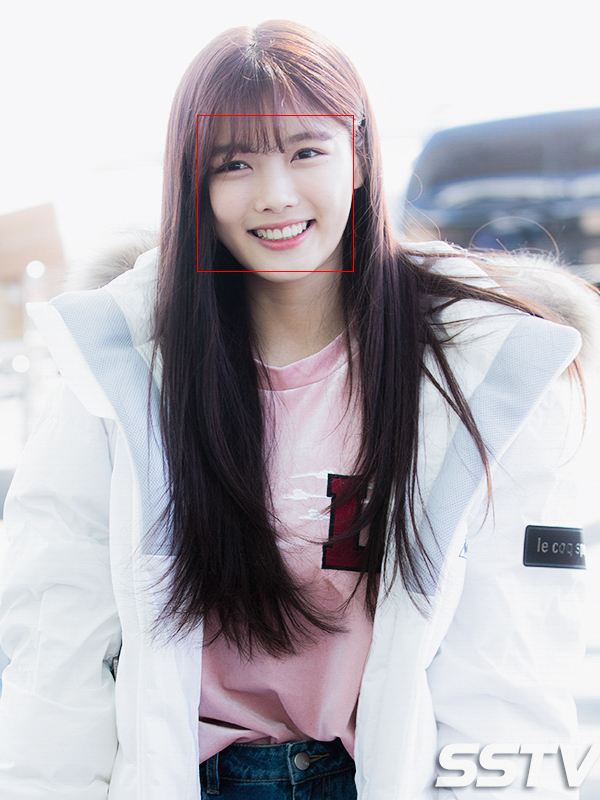

In [15]:
#Convert width height to a point in a rectangle
def getRectangle(faceDictionary):
    rect = faceDictionary['faceRectangle']
    left = rect['left']
    top = rect['top']
    bottom = left + rect['height']
    right = top + rect['width']
    return ((left, top), (bottom, right))

#Download the image from the url
response = requests.get(img_url)
img = Image.open(BytesIO(response.content))

#For each face returned use the face rectangle and draw a red box.
draw = ImageDraw.Draw(img)
for face in faces:
    draw.rectangle(getRectangle(face), outline='red')

#Display the image in the users default image browser.
img